In [2]:
from github import Github
import re
import pandas as pd
import matplotlib
from scipy.stats import pearsonr, spearmanr

In [ ]:
token = ''
input_file = 'boa-job103328-output.txt'

g = Github(token)

In [ ]:
def get_startgazer_count_from_github(id:str):
    print(f"id: {id}")
    try:
        repo = g.get_repo(id)
        return repo.stargazers_count
    except Exception as e:
        print(e)
        return -1

def get_entry_from_boa_line(line:str):
    x = re.search("metrics\[(https://github.com/(.*)\.git)\] = (.*):(.*):(.*):(.*)\n", line)
    url = x.group(1)
    id = x.group(2)
    methods_name = x.group(3)
    methods_count = x.group(4)
    statements_name =  x.group(5)
    statements_count = x.group(6)
    return (url, id, methods_name, methods_count, statements_name, statements_count)

## Import and Parse Data

In [ ]:
with open(input_file) as f:
    lines = f.readlines()

entries = list()
for line in lines:
    entry = get_entry_from_boa_line(line)
    entries.append(entry)

input_raw = pd.DataFrame(entries, columns=["url", "id", "method_file_name", "method_count_max", "statement_file_name", "statement_count_max"])

In [ ]:
input_raw["method_count_max"] = input_raw["method_count_max"].astype(int)
input_raw["statement_count_max"] = input_raw["statement_count_max"].astype(int)

# Clean out all entries where neither method nor statements could be counted
input_no_nulls = input_raw.query("method_count_max > 0 & statement_count_max > 0")

input_no_nulls.sort_values(by=["statement_count_max"])

In [ ]:
print(len(input_raw),len(input_no_nulls))

## Input Data Analisis

## Load Stargazer Count

In [3]:
# df = input_no_nulls.sample(4500)
# df['stargazer_count'] = df.apply(lambda row: get_startgazer_count_from_github(row['id']), axis = 1)
# df.to_pickle("dataset_with_stargazers_2")

df = pd.read_pickle("./dataset_with_stargazers")

## Filter out non projects via stargazer count

In [4]:
test = df[["id", "method_count_max", "statement_count_max", "stargazer_count"]]
test = test[test["stargazer_count"] >= 10]

In [15]:

test.sort_values(by="method_count_max")

,id,method_count_max,statement_count_max,stargazer_count
24129,lukeholder/craft-editor,1,3,16
34311,tglman/orientdb-c,1,28,41
21766,jyaganeh/android-google-maps-demo,1,5,10
6449,StylingAndroid/Spans,1,13,10
2504,FuseByExample/external-mq-fabric-client,1,43,11
...,...,...,...,...
12570,codefollower/Lealone,238,5097,2180
15841,evernote/evernote-sdk-java,264,2377,257
32890,societies/SOCIETIES-Platform,272,2090,24
20804,jjzazuet/seeds-libraries,429,2068,34


## Analysis

In [8]:
print("General statistics")
print(f"sample: {len(df)}, with stars count: {len(df[df['stargazer_count'] >= 0])}, Software Projects: {len(test)}")
print(f"Sample Size {len(test)}")
print(f"#stargazers  mean: {test['stargazer_count'].mean()}, min: {test['stargazer_count'].min()}, max: {test['stargazer_count'].max()}, std: {test['stargazer_count'].std() }")
print(f"method_count_max  mean: {test['method_count_max'].mean()}, min: {test['method_count_max'].min()}, max: {test['method_count_max'].max()}, std: {test['method_count_max'].std() }")
print(f"statement_count_max  mean: {test['statement_count_max'].mean()}, min: {test['statement_count_max'].min()}, max: {test['statement_count_max'].max()}, std: {test['statement_count_max'].std() }")

test.boxplot(column=['stargazer_count'])

General statistics
sample: 4500, with stars count: 3458, Software Projects: 250
Sample Size 250
#stargazers  mean: 145.0, min: 10, max: 6076, std: 514.7423576694621
method_count_max  mean: 44.6, min: 1, max: 477, std: 59.55585276354939
statement_count_max  mean: 419.056, min: 3, max: 8709, std: 780.6195284881285


<Axes: >

<Axes: >

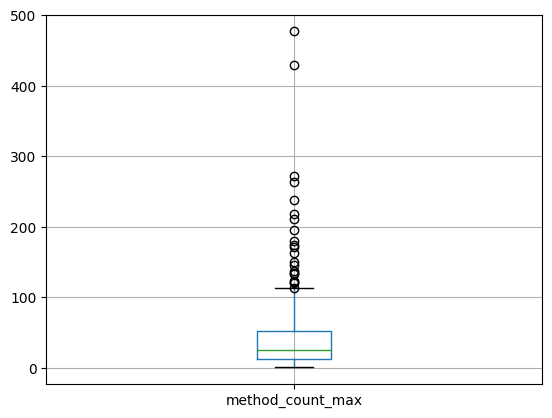

In [29]:
test.boxplot(column=['method_count_max'])

<Axes: >

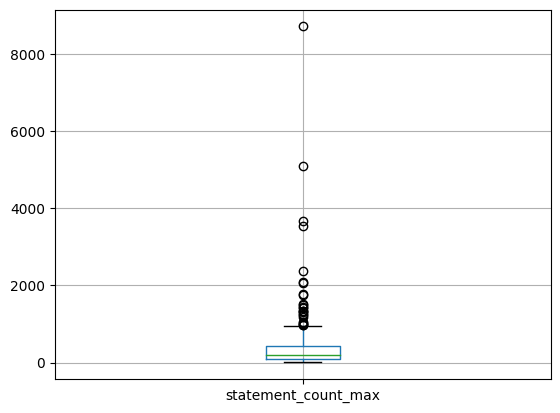

In [30]:
test.boxplot(column=['statement_count_max'])


Analysis method_count_max
PearsonRResult(statistic=0.2810555366181144, pvalue=6.394591796196751e-06)
SignificanceResult(statistic=0.26547508217113724, pvalue=2.1087261321021967e-05)

Analysis statement_count_max
PearsonRResult(statistic=0.1955528797338218, pvalue=0.0018930714955898197)
SignificanceResult(statistic=0.2107636815700245, pvalue=0.0007979222954544701)


<Axes: xlabel='stargazer_count', ylabel='statement_count_max'>

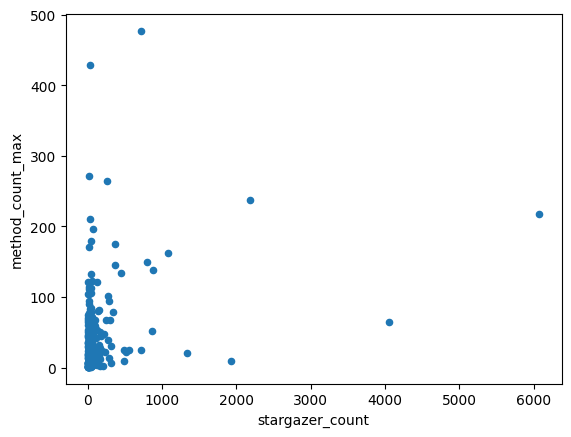

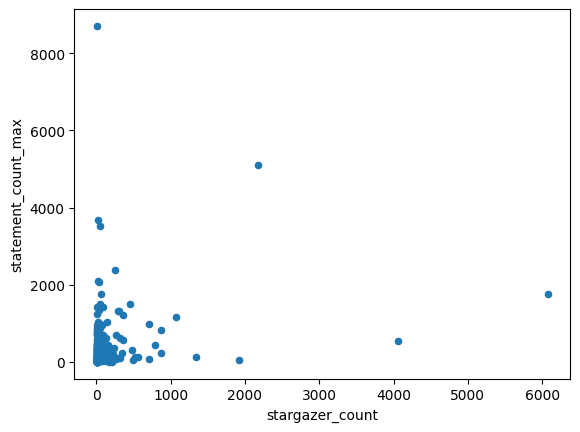

In [23]:
print("\nAnalysis method_count_max")
print(pearsonr(test['method_count_max'], test['stargazer_count']))
print(spearmanr(test['method_count_max'], test['stargazer_count']))
print("\nAnalysis statement_count_max")
print(pearsonr(test['statement_count_max'], test['stargazer_count']))
print(spearmanr(test['statement_count_max'], test['stargazer_count']))

test.plot.scatter(x="stargazer_count", y="method_count_max")
test.plot.scatter(x="stargazer_count", y="statement_count_max")